## 지역 이진화

- 균일하지 않은 조명 환경에서 촬영된 영상의 이진화하기

   - sudoku.jpg파일을 입력으로 사용
   
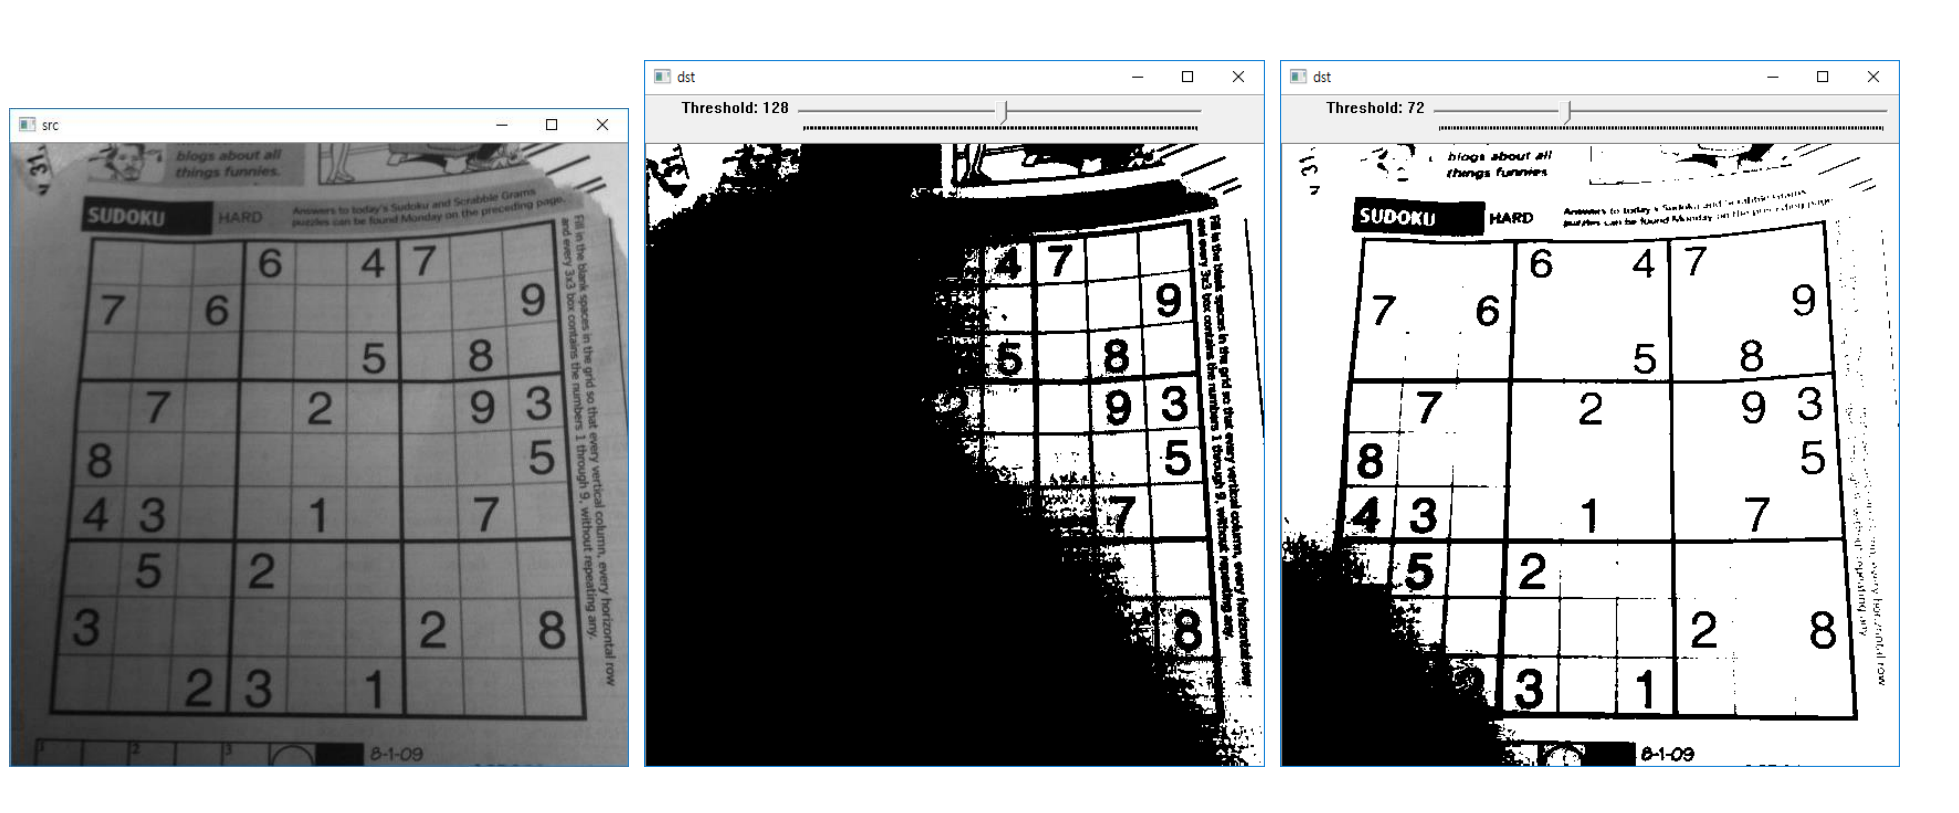

- 위의 문제 해결하기

   - 불균일한 조명 성분 보상 후 이진화 수행하기
   
 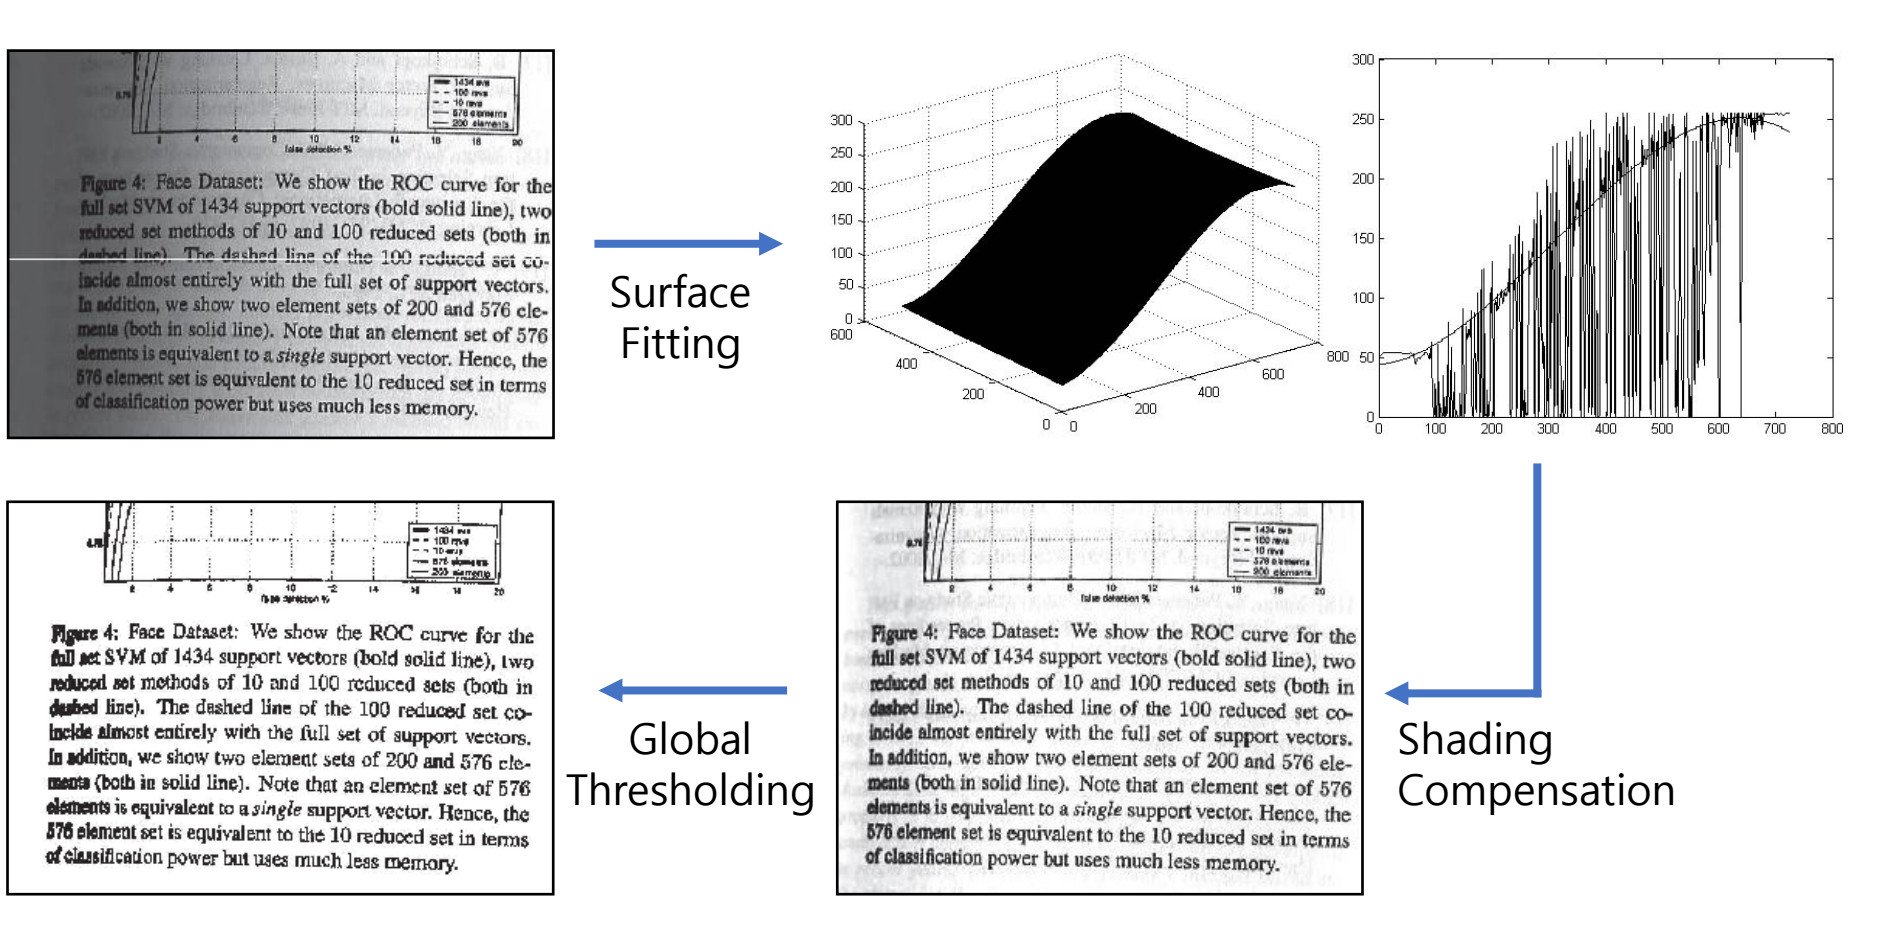
 
 
   - 픽셀 주변에 윈도우 설정하여 지역 이진화 수행
   
      - 윈도우 크기
      
      - 윈도우 형태 : Uniform? Gaussian?
      
      - 윈도우 겹칠건가? Overlap? Non-overlap?
      
      - 원도우 안에 배경 혹은 객체만 존재
      
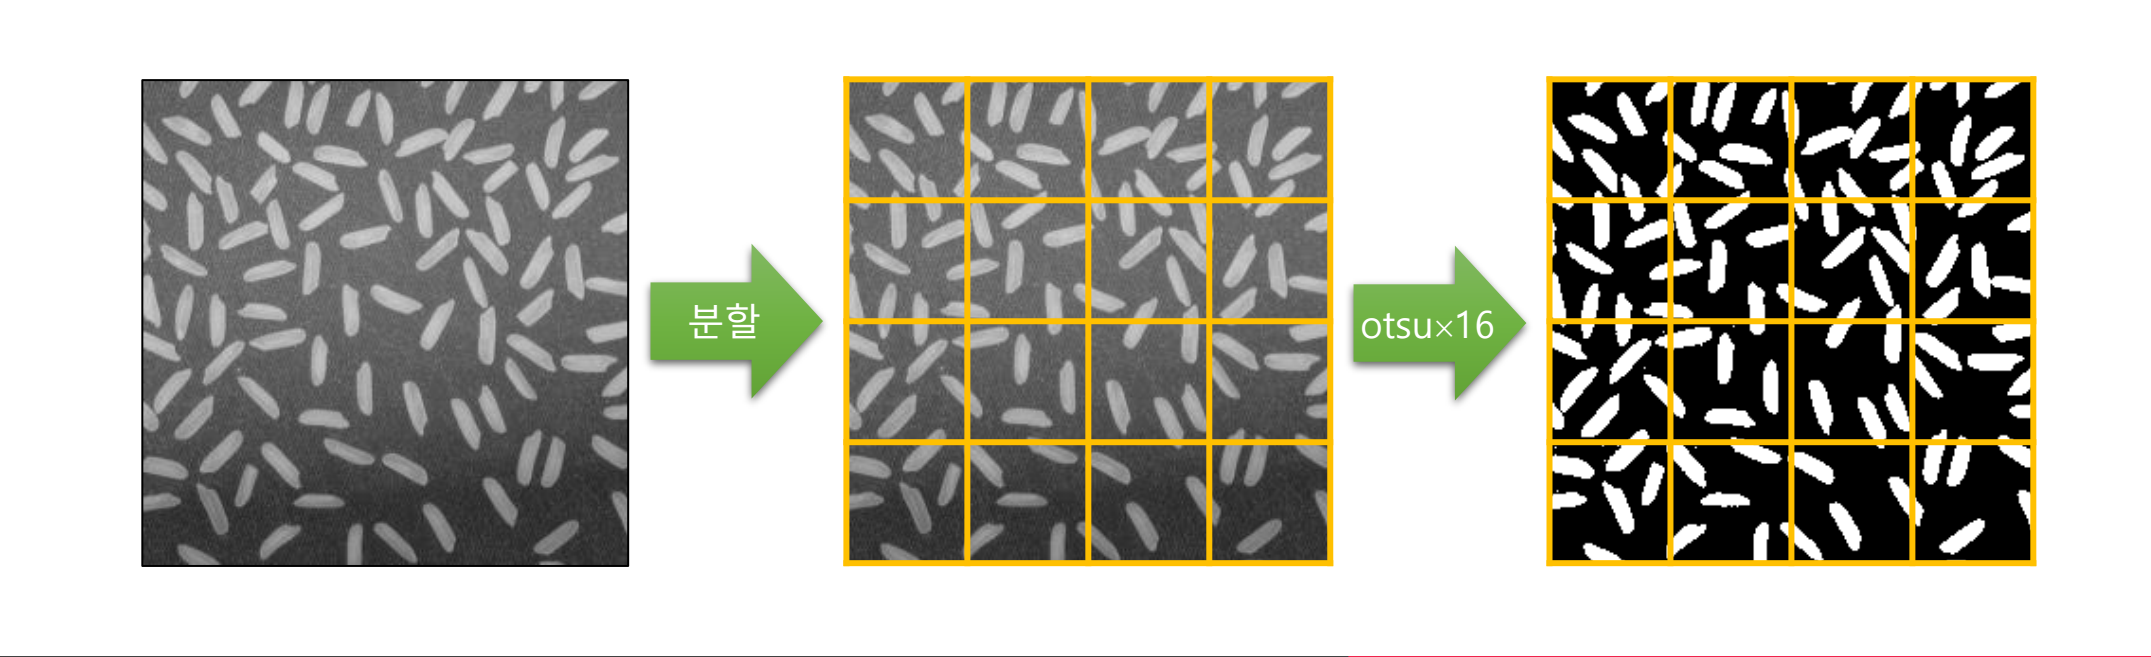  

In [ ]:
## 예제

src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)
# 전역 이진화 by Otsu's method
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 지역 이진화 by Otsu's method

dst2 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU, dst_)


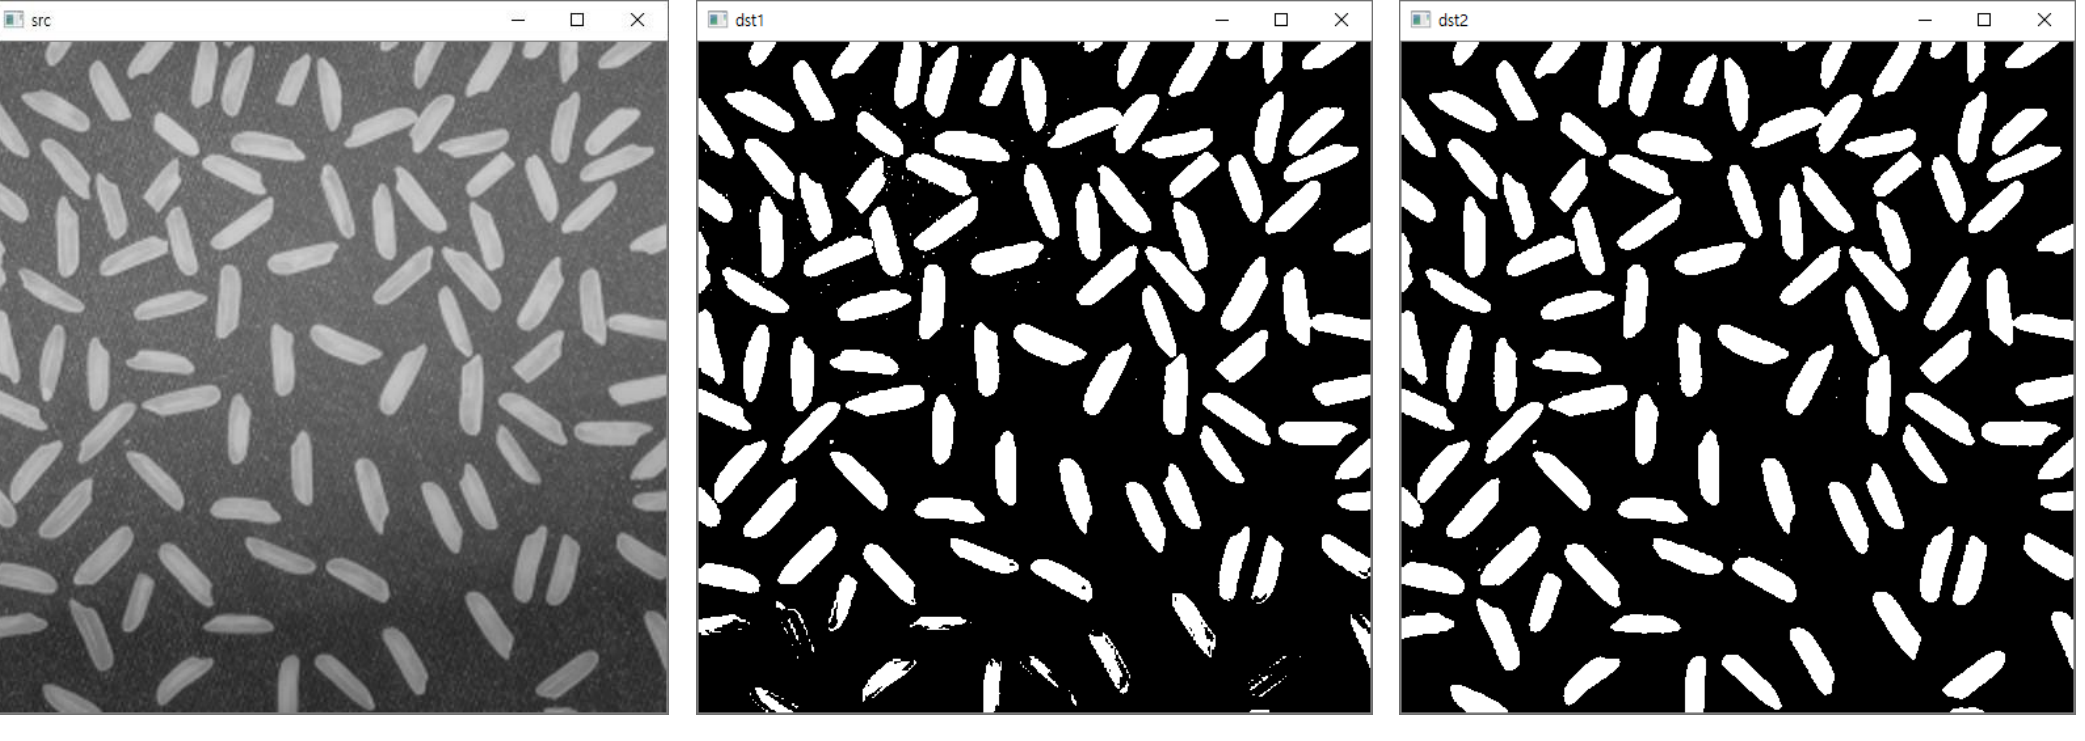


### Opencv 적응형 이진화

cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, 
thresholdType, blockSize, C, dst=None) -> dst


- src: 입력 영상. 그레이스케일 영상.

- maxValue: 임계값 함수 최댓값. 보통 255.

- adaptiveMethod: 블록 평균 계산 방법 지정. cv2.ADAPTIVE_THRESH_MEAN_C는 산술평균, cv2.ADAPTIVE_THRESH_GAUSSIAN_C는 가우시안 가중치 평균

- thresholdType: cv2.THRESH_BINARY 또는 cv2.THRESH_BINARY_INV 지정

- blockSize: 블록 크기. 3 이상의 홀수.

- C: 블록 내 평균값 또는 블록 내 가중 평균값에서 뺄 값. 
(x, y) 픽셀의 임계값으로 𝑇 𝑥, 𝑦 = 𝜇𝐵 𝑥, 𝑦 − 𝐶 를 사용

In [ ]:
#Opencv적응형 예제

src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
def on_trackbar(pos):

    bsize = pos
    if bsize % 2 == 0:

        bsize = bsize - 1

    if bsize < 3:
        bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)
    
cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

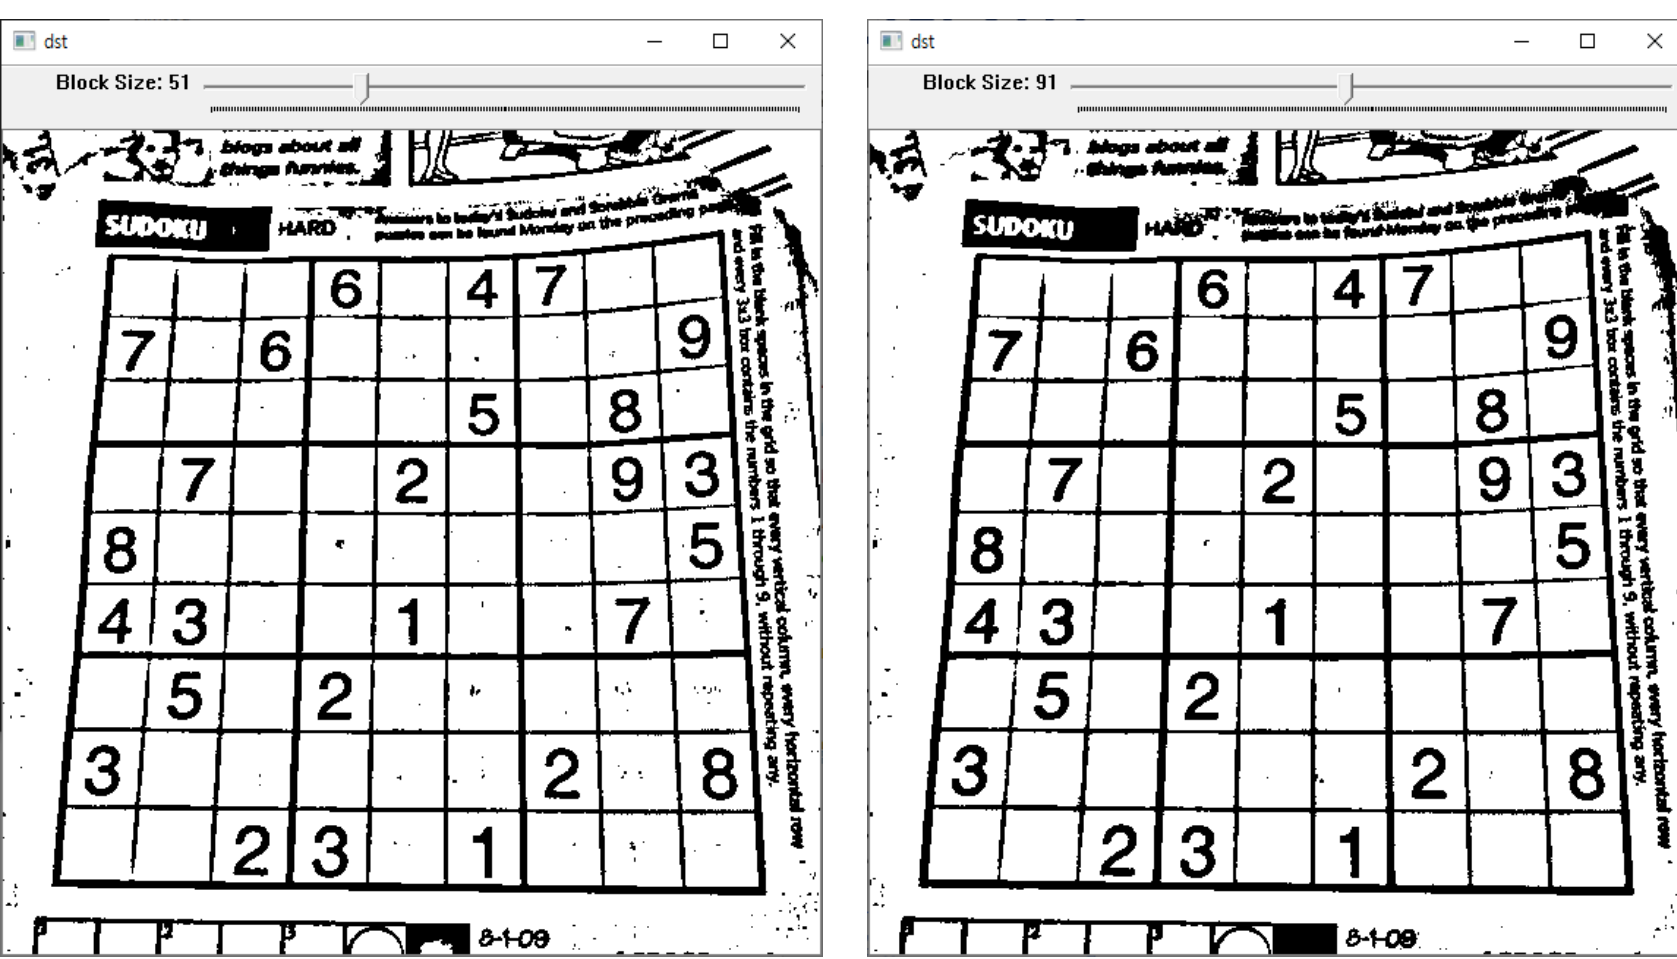